# Assignment-4 | Sahil Sareen RA1911003010464

### 18CSE398J Machine Learning - Core Concepts with Applications

#### Performing k-means clustering on  Iris flower Dataset from Assignment-4

***

### Data Collection

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris = "iris.csv"
df = pd.read_csv(iris)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data cleaning

In [3]:
df.drop(['sepal_length', 'sepal_width', 'species'],axis='columns',inplace=True)

In [4]:
df.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


#### Columns that were not of much use are dropped.
#### We only want to do clustering of petals that's why sepal columns are dropped.
#### Species column was of string that's why removed.

### Data Visualization

Text(0, 0.5, 'Petal Width')

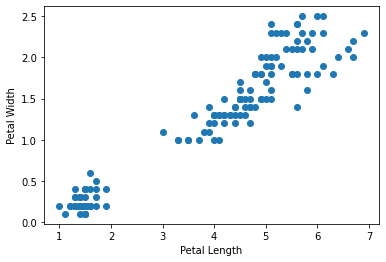

In [5]:
plt.scatter(df.petal_length,df.petal_width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

### K-Means

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
df['cluster'] = y_predicted
df.head(5)

,petal_length,petal_width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [9]:
km.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

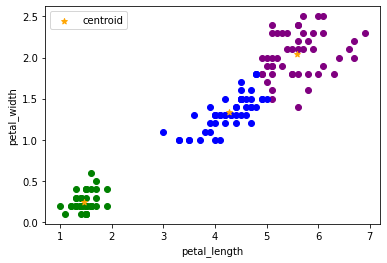

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.petal_length,df1['petal_width'],color='green')
plt.scatter(df2.petal_length,df2['petal_width'],color='purple')
plt.scatter(df3.petal_length,df3['petal_width'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

#### It is observer that the data is not properly scaled so for getting better results, proper preprocessing of the dataset should be done using min max scaler.

### Preprocessing using min max scaler

In [11]:
scaler = MinMaxScaler()

scaler.fit(df[['petal_width']])
df['petal_width'] = scaler.transform(df[['petal_width']])

scaler.fit(df[['petal_length']])
df['petal_length'] = scaler.transform(df[['petal_length']])

In [12]:
df.head()

,petal_length,petal_width,cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


Text(0, 0.5, 'Petal Width')

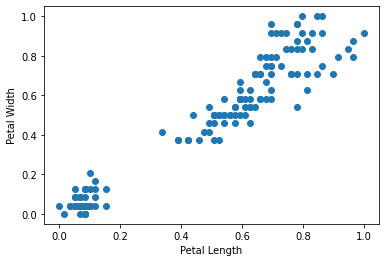

In [13]:
plt.scatter(df.petal_length,df.petal_width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
df['cluster']=y_predicted
df.head()

,petal_length,petal_width,cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


In [16]:
km.cluster_centers_

array([[ 7.78954802e-01,  8.07291667e-01,  1.00000000e+00],
       [ 5.54106910e-01,  5.17628205e-01,  2.00000000e+00],
       [ 7.86440678e-02,  6.00000000e-02, -2.22044605e-16]])

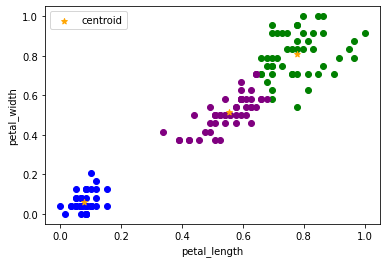

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.petal_length,df1['petal_width'],color='green')
plt.scatter(df2.petal_length,df2['petal_width'],color='purple')
plt.scatter(df3.petal_length,df3['petal_width'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='orange',marker='*',label='centroid')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

#### It is observed that, After proper scaling much better results are produced.

### Finding optimal value of K using Elbow Method:

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

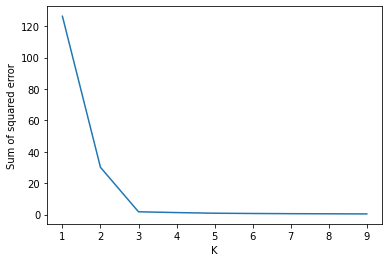

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#### As per the graph it can be observed that the optimal number of clusters i.e. value of K should be 3. Hence, the model is successfully evaluated.